<center>
    <h1 id='time-series-i' style='color:#7159c1'>🕰️ Time Series I 🕰️</h1>
    <i>Applying Linear Regressions</i>
</center>

```
- Linear Regression
- Time-Step
- Lag
```

---

<h1 id='0-linear-regressions' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Linear Regressions</h1>

Equation:

$$
\text{target} = w_1 \cdot \text{feature_1} + w_2 \cdot \text{feature_2} + \text{bias}
$$

where:

$w_n \text{: regression coefficients}$

$\text{bias: intercept (tells where the graph intercepts the y-axis)}$

In [14]:
# ---- Settings ----
import pandas as pd # pip install pandas
import numpy as np # pip install numpy
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk
import seaborn as sns # pip install seaborn
from sklearn.linear_model import LinearRegression # pip install sklearn

np.random.seed(20241701)
plt.style.use('cyberpunk')

plot_params = dict(
    color='0.75'
    , style='.-'
    , markeredgecolor='0.25'
    , markerfacecolor='0.25'
    , legend=False
)

# ---- Reading Dataset ----
book_sales_df = pd.read_csv(
    './datasets/book_sales/book_sales.csv'
    , index_col='Date'
    , parse_dates=['Date']
)

book_sales_df.index = pd.to_datetime(
    book_sales_df.index
    , format='%d/%m/%y'
)

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`) representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with
book_sales_df = book_sales_df.to_period()
book_sales_df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


<h1 id='1-time-step' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Time-Step</h1>

`Time-Step` represents the length of the dataframe, which means, how many days are the dates from.

In [13]:
# ---- Adding 'Time-Step' Variable ----
book_sales_time_step_df = book_sales_df.copy()
book_sales_time_step_df['Time-Step'] = np.arange(len(book_sales_df.index))
book_sales_time_step_df.head()

,Paperback,Hardcover,Time-Step
Date,,,
2000-04-01,199,139,0
2000-04-02,172,128,1
2000-04-03,111,172,2
2000-04-04,209,139,3
2000-04-05,161,191,4


In [17]:
# ---- Creating the Linear Model with the Time-Step Dataset ----
#
# - the equation changes to:
#     target = weights * time_steps + bias
#
X = book_sales_time_step_df.loc[:, ['Time-Step']]
y = book_sales_time_step_df.loc[:, 'Paperback']

model = LinearRegression()
model.fit(X, y)
y_predictions = pd.Series(
    model.predict(X)
    , index=X.index
)

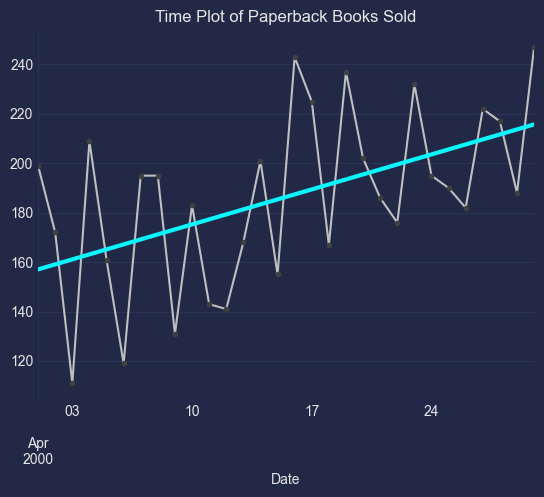

In [19]:
# ---- Plotting the Results ----
#
# - linear relationship of the number of paperback books sold by time
#
axis = y.plot(**plot_params)
axis = y_predictions.plot(ax=axis, linewidth=3)
axis.set_title('Time Plot of Paperback Books Sold')
plt.show()

<h1 id='2-lag' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | Lag</h1>

`Lag` represents the previous day/time data of a feature. When the previous day/time doesn't have information, it's replaced by NaN.

In [22]:
# ---- Adding 'Lag' Variable ----
book_sales_lag_df = book_sales_time_step_df[['Paperback', 'Time-Step']].copy()
book_sales_lag_df['Lag_1'] = book_sales_lag_df['Paperback'].shift(1)
book_sales_lag_df.head()

,Paperback,Time-Step,Lag_1
Date,,,
2000-04-01,199,0,NaN
2000-04-02,172,1,199.0
2000-04-03,111,2,172.0
2000-04-04,209,3,111.0
2000-04-05,161,4,209.0


In [26]:
# ---- Creating the Linear Model using 'Lag' Variable ----
X = book_sales_lag_df.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = book_sales_lag_df.loc[:, 'Paperback']

y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)
y_predictions = pd.Series(
    model.predict(X)
    , index=X.index
)

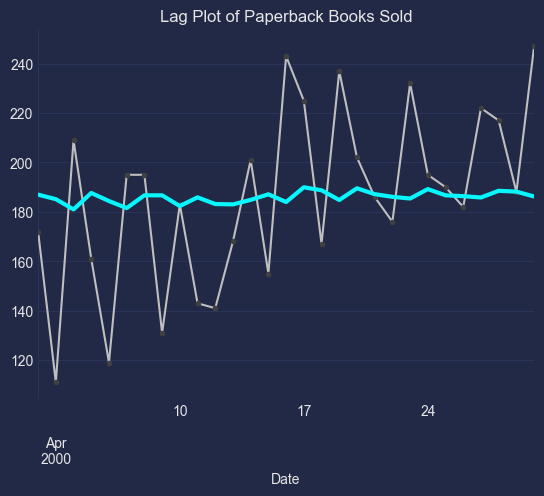

In [32]:
# ---- Plotting the Results ----
#
# - linear relationship of the number of paperback books sold by time
#
axis = y.plot(**plot_params)
axis = y_predictions.plot(ax=axis, linewidth=3)
axis.set_title('Lag Plot of Paperback Books Sold')
plt.show()

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).